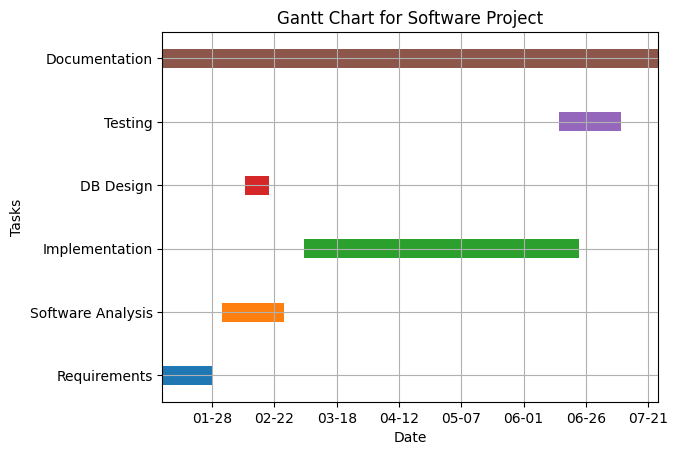

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

# Step 2: Create the data for the Gantt chart
tasks = ['Requirements', 'Software Analysis', 'Implementation', 'DB Design', 'Testing','Documentation']
start_dates = ['2024-01-08', '2024-02-1', '2024-03-05', '2024-02-10','2024-06-15','2024-01-08']
durations = [20, 25, 110,10,25,200]

# Step 3: Initialize the figure and axis
#
# Step 4: Set y-axis tick labels
fig, ax = plt.subplots()
 
ax.set_yticks(np.arange(len(tasks)))
ax.set_yticklabels(tasks)

# Step 5: Plot each task as a horizontal bar
for i in range(len(tasks)):
    start_date = pd.to_datetime(start_dates[i])
    end_date = start_date + pd.DateOffset(days=durations[i])
    ax.barh(i, end_date - start_date, left=start_date, height=0.3, align='center')

# Step 6: Set x-axis limits
min_date = pd.to_datetime(min(start_dates))
#max_date = pd.to_datetime(max(start_dates)) + pd.DateOffset(days=max(durations))
max_date = pd.to_datetime(max(start_dates)) + pd.DateOffset(40)
ax.set_xlim(min_date, max_date)

# Step 7: Customize the chart
ax.xaxis_date()
#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlabel('Date')
ax.set_ylabel('Tasks')
ax.set_title('Gantt Chart for Software Project')

# Step 8: Display the chart
plt.grid(True)
plt.show()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdatesimport
import altair as alt

In [31]:
x_scale = alt.Scale(domain=('2024-01-07', '2024-08-01'))

source = pd.DataFrame([
    {"task": "Requirements", "start": '2024-01-08', "end": '2024-01-20',"order":1},
    {"task": "Software Analysis", "start": '2024-02-1', "end": '2024-03-15',"order":2},
    {"task": "Implementation", "start": '2024-03-05', "end": '2024-07-03',"order":4},
    {"task": "DB Design", "start": '2024-02-10', "end": '2024-02-20',"order":3},
    {"task": "Testing", "start": '2024-06-15', "end": '2024-07-10',"order":5},
    {"task": "Documentation", "start": '2024-01-08', "end": '2024-07-20',"order":1}
])

In [34]:
y_scale = alt.Scale(padding=0.4)
barras = alt.Chart(source, title="Gantt Chart for Software Project").mark_bar().encode(
x=alt.X('start:T', axis=alt.Axis(format='%m-%d', title='Start and End Dates of Tasks',labelAngle=270)),
x2='end',
y=alt.Y('task', axis=alt.Axis(title="Tasks"),scale=y_scale), color=alt.Color("order:N"))
lineas1 = alt.Chart(source).mark_rule(color='black',strokeDash=[1,1]).encode(x='start:T')
lineas2 = alt.Chart(source).mark_rule(color='black',strokeDash=[1,1]).encode(x='end:T')
(barras + lineas1 + lineas2 ).properties(
    width=550, height=200).configure_axis(
   # domain=False,
    labelFontSize=12,
    titleFontSize=16,
    labelFontWeight='normal',
    titleFontWeight='normal',
#  font='Arial')
).configure_title(fontWeight='normal',fontSize=18)

alt.LayerChart(...)